## 2. Базовая оптимизация

In [53]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

%matplotlib inline
plt.style.use('seaborn')

C:\Users\Home\AppData\Local\Temp\ipykernel_11028\2150022218.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Описание задачи

Данные представлены в формате CSV.  Каждая строка представляет молекулу. 

Первый столбец Activity содержит экспериментальные данные, описывающие фактический биологический ответ [0, 1]; 
Остальные столбцы D1-D1776 представляют собой молекулярные дескрипторы — это вычисляемые свойства, 
которые могут фиксировать некоторые характеристики молекулы, например размер, форму или состав элементов.

### Знакомство с данными и их исследование

In [54]:
data = pd.read_csv('data/_train_sem09 (1).csv')

data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Создаем матрицу наблюдений $X$ и вектор ответов $y$

In [55]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

Разделяем выборку на тренировочную и тестовую в соотношении 80/20. Для сохранения соотношений целевого признака используем параметр stratify (стратифицированное разбиение). 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)

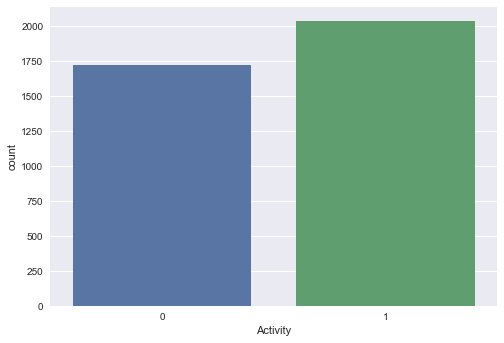

In [57]:
# Проверим на сбалансированность классов:
sns.countplot(data=data, x='Activity');

### Оценка метрик моделей LogisticRegression и RandomForestClassifier без дополнительной настройки

### <center> **LogisticRegression**

In [58]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(random_state=42, max_iter = 1000)

#Обучаем модель, минимизируя logloss
log_reg.fit(X_train, y_train)

y_test_pred = log_reg.predict(X_test)
print('F1 на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 на тестовом наборе: 0.78


### <center> **RandomForestClassifier**

In [59]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 

y_test_pred = rf.predict(X_test)
print('F1 на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 на тестовом наборе: 0.81


###  Подбор гиперпараметров с помощью базовых  методов оптимизации GridSearchCV и RandomizedSearchCV

### <center> **GridSearchCV**

In [60]:
from sklearn.model_selection import GridSearchCV

penalty_list = ['l2', 'none']
solver_list = ['lbfgs', 'sag']
c_list = [0.01, 0.1, 1]

param_grid = {'penalty': penalty_list , # тип регуляризации
              'solver': solver_list, # алгоритм оптимизации
               'C': c_list} # уровень силы регурялизации

grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=42, #генератор случайных чисел
        max_iter=100 #количество итераций на сходимость
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 
y_test_pred = grid_search.predict(X_test)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: total: 6.9 s
Wall time: 2min 22s
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}


c:\Users\Home\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Значения метрики f1 на тестовом наборе увеличилось с 0.78 до 0.79 для LogisticRegression

In [61]:
n_estimators = [100,200,300]
max_depth = [1,3,5,7,10,22] 
min_samples_leaf = [1,2,3] 

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,             
               'min_samples_leaf': min_samples_leaf
               }

grid_search = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

y_train_pred = grid_search.predict(X_train)
print('f1_score на тренировоном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

CPU times: total: 5.46 s
Wall time: 5min 44s
f1_score на тестовом наборе: 0.82
Наилучшие значения гиперпараметров: {'max_depth': 22, 'min_samples_leaf': 1, 'n_estimators': 200}
f1_score на тренировоном наборе: 1.00


Для RandomForestClassifier значение метрики f1 на тестовом наборе увеличилось с 0.81 до 0.82

### <center> **RandomizedSearchCV**

In [62]:
from sklearn.model_selection import RandomizedSearchCV

penalty_list = ['l2', 'none']
solver_list = ['lbfgs', 'sag']
c_list = [0.01, 0.1, 1]

param_grid = {'penalty': penalty_list , # тип регуляризации
              'solver': solver_list, # алгоритм оптимизации
               'C': c_list} # уровень силы регурялизации

            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42, max_iter=100), 
    param_distributions=param_grid, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search.fit(X_train, y_train) 
y_test_pred = random_search.predict(X_test)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))


CPU times: total: 7.22 s
Wall time: 1min 52s
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.1}


c:\Users\Home\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


За 10 итераций метрику улучшить не удалось. Гиперпараметры получились такие же как при GridSearchCV.
Но времени было затрачено меньше.

PS Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'} методом GridSearchCV. f1_score на тестовом наборе: 0.79

In [63]:
n_estimators = [100,200,300]
max_depth = [1,3,5,7,10,22] 
min_samples_leaf = [1,2,3] #1

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,             
               'min_samples_leaf': min_samples_leaf
               }


random_search = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_grid, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  

%time random_search.fit(X_train, y_train) 
y_test_pred = random_search.predict(X_test)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 4.02 s
Wall time: 49 s
f1_score на тестовом наборе: 0.83
Наилучшие значения гиперпараметров: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 22}


Метрика увеличилась с 0.82 до 0.83
При такой же сетке гиперпараметров RandomizedSearchCV затратил времени в четыре раза меньше чем GridSearchCV

PS Наилучшие значения гиперпараметров: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200} методом GridSearchCV f1_score на тестовом наборе: 0.82

**Вывод по базовой оптимизации:**
На множестве примеров нам удалось продемонстрировать более эффективную и быструю работу RandomizedSearchCV над GridSearchCV.

###  Подбор гиперпараметров с помощью продвинутой оптимизации Hyperopt и Optuna

### <center> **Hyperopt**

In [64]:
#делаем импорт и выведем версию библиотеки
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
import time


Интерфейс hyperopt отличается от Grid или RandomizedSearch, поэтому нам нужно создать функцию для минимизации, она должна принимать словарь значений гиперпараметров и возвращать значение целевой функции.

**Настроим оптимизацию гиперпараметров для алгоритма логистической регрессии. Используем кросс-валидацию.**

In [65]:
penalty_list = ['l2', 'none']
solver_list = ['lbfgs', 'sag']

space = {'penalty': hp.choice('penalty',penalty_list) , # тип регуляризации
        'solver': hp.choice('solver',solver_list), # алгоритм оптимизации
        'C': hp.uniform(label='C', low=0.01, high=1)} # уровень силы регурялизации


In [66]:
# зафксируем random_state
random_state = 42
def hyperopt_lr(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    
    params = {'penalty': str(params['penalty']),
              'solver': str(params['solver']),
              'C': float(params['C'])
              }

    # используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params, max_iter = 100, random_state=random_state)

    # обучаем модель без кросс-валидации
    # model.fit(X, y)
    # score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [67]:
# начинаем подбор гиперпараметров
start = time.time()

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_lr, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

from time import strftime
from time import gmtime
print('Optimisation time: {}',strftime("%M:%S", gmtime(time.time() - start)))

100%|██████████| 20/20 [04:32<00:00, 13.63s/trial, best loss: -0.7829442049757983]
Optimisation time: {} 04:32


In [68]:
print('Best parameters:', ' penalty=',penalty_list[best['penalty']],' solver=',solver_list[best['solver']], ' С=',float(best['C']))

Best parameters:  penalty= l2  solver= lbfgs  С= 0.08292441519601887


In [69]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(random_state=random_state, 
                                        penalty = penalty_list[best['penalty']],   
                                        solver = solver_list[best['solver']],
                                        C = float(best['C']),
                                        max_iter = 1000)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.79


Для логистической регрессии метрику улучшить не удалось. 

Best parameters:  penalty= l2  solver= lbfgs  С= 0.08292441519601887 f1_score на тестовом наборе: 0.79

PS RandomizedSearchCV Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.1} f1_score на тестовом наборе: 0.79

**Настроим оптимизацию гиперпараметров для алгоритма случайного леса. Используем кросс-валидацию.**

In [70]:
# зададим пространство поиска гиперпараметров

space={'n_estimators': hp.quniform('n_estimators', 100, 300, 10),
       'max_depth' : hp.quniform('max_depth', 15, 40, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 7, 1)
      }

In [71]:
# зафксируем random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель без кросс-валидации
    # model.fit(X, y)
    # score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [72]:
# начинаем подбор гиперпараметров
%time

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

print("Наилучшие значения гиперпараметров {}".format(best))

CPU times: total: 0 ns
Wall time: 0 ns
100%|██████████| 20/20 [03:35<00:00, 10.78s/trial, best loss: -0.8097798646226206]
Наилучшие значения гиперпараметров {'max_depth': 22.0, 'min_samples_leaf': 3.0, 'n_estimators': 200.0}


In [73]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(random_state=random_state, n_estimators=int(best['n_estimators']),   
                                        max_depth=int(best['max_depth']),
                                        min_samples_leaf=int(best['min_samples_leaf']))
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.83


Видим, что Hyperot с кросс-валидацией смог улучшить нашу метрику для RandomForestClassifier

Для Hyperopt с кросс-валидацией наилучшие значения гиперпараметров {'max_depth': 22.0, 'min_samples_leaf': 3.0, 'n_estimators': 200.0} f1_score на тестовом наборе: 0.83

Для RandomizedSearchCV наилучшие значения гиперпараметров были: {'n_estimators': 300, 'min_samples_leaf': 3, 'max_depth': 22} f1_score на тестовом наборе: 0.82

### <center> **Optuna**

In [74]:
import optuna

**Настроим оптимизацию гиперпараметров для алгоритма логистической регрессии. Используем кросс-валидацию.** 

In [75]:
penalty_list = ['l2', 'none']
solver_list = ['lbfgs', 'sag']


def optuna_lr(trial):
  # задаем пространства поиска гиперпараметров
  penalty = trial.suggest_categorical('penalty', penalty_list)
  solver = trial.suggest_categorical('solver', ['lbfgs', 'sag'])
  C = trial.suggest_float('C', low=0.01, high=1, step=0.01)
  
  # создаем модель
  model = linear_model.LogisticRegression(penalty=penalty,
                                          solver=solver,
                                          C=C,
                                          max_iter = 100,
                                          random_state=42)
  # обучаем модель
  #model.fit(X_train, y_train)
  #score = metrics.f1_score(y_train, model.predict(X_train))
  
   # обучаем модель с помощью кросс-валидации
  score = cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs=-1).mean()

  return score
  

In [ ]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="LogisticRegression", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_lr, n_trials=20)

In [77]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
#print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'penalty': 'l2', 'solver': 'lbfgs', 'C': 0.04}


In [78]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(**study.best_params,max_iter = 1000, random_state=42 )
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


Optuna удалось улучшить нашу метрику для LogisticRegression с 0.79 до 0.8

Для Optuna с кросс-валидацией наилучшие значения гиперпараметров {'penalty': 'l2', 'solver': 'lbfgs', 'C': 0.04} f1_score на тестовом наборе: 0.8

Для RandomizedSearchCV наилучшие значения гиперпараметров были: Best parameters:  penalty= l2  solver= lbfgs  С= 0.0829 f1_score на тестовом наборе: 0.79

**Настроим оптимизацию гиперпараметров для алгоритма случайного леса. Используем кросс-валидацию.** 

In [79]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 300, 10)
  max_depth = trial.suggest_int('max_depth', 15, 40, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  #model.fit(X_train, y_train)
  #score = metrics.f1_score(y_train, model.predict(X_train))
  
   # обучаем модель с помощью кросс-валидации
  score = cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs=-1).mean()

  return score
  
  

In [80]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-03-08 23:37:17,095] A new study created in memory with name: RandomForestClassifier
[I 2023-03-08 23:37:36,768] Trial 0 finished with value: 0.8151351589319347 and parameters: {'n_estimators': 260, 'max_depth': 40, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8151351589319347.
[I 2023-03-08 23:37:48,731] Trial 1 finished with value: 0.8079169442191955 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8151351589319347.
[I 2023-03-08 23:38:04,550] Trial 2 finished with value: 0.8050802850118579 and parameters: {'n_estimators': 250, 'max_depth': 21, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8151351589319347.
[I 2023-03-08 23:38:18,472] Trial 3 finished with value: 0.8042080387870817 and parameters: {'n_estimators': 220, 'max_depth': 23, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8151351589319347.
[I 2023-03-08 23:38:31,554] Trial 4 finished with value: 0.8055112185508261 and parameters: {'n_

CPU times: total: 1.7 s
Wall time: 5min 32s


In [81]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
#print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 210, 'max_depth': 20, 'min_samples_leaf': 3}


In [82]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.83


Видим, что Optuna как и Hyperopt улучшил нашу метрику для RandomForestClassifier (Wall time: 5min 26s)

Для Optuna с кросс-валидацией наилучшие значения гиперпараметров {'n_estimators': 220, 'max_depth': 15, 'min_samples_leaf': 3} f1_score на тестовом наборе: 0.83

Для RandomizedSearchCV наилучшие значения гиперпараметров были: {'n_estimators': 300, 'min_samples_leaf': 3, 'max_depth': 22} f1_score на тестовом наборе: 0.83


1)   GridSearchCV

1.1) LogisticRegression
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'} f1_score на тестовом наборе: 0.79 (Wall time: 2min 22s)

1.2) RandomForestClassifier
Наилучшие значения гиперпараметров: {'max_depth': 22, 'min_samples_leaf': 1, 'n_estimators': 200} f1_score на тестовом наборе: 0.82 (Wall time: 5min 44)

2)   RandomizedSearchCV

2.1) LogisticRegression
Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.1} f1_score на тестовом наборе: 0.79 (Wall time: 1min 52s)

2.2) RandomForestClassifier
Наилучшие значения гиперпараметров: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 22} f1_score на тестовом наборе: 0.83 (Wall time: 49 s)

3)   Hyperopt

3.1) LogisticRegression
Наилучшие значения гиперпараметров:  penalty= l2  solver= lbfgs  С= 0.08292441519601887 f1_score на тестовом наборе: 0.79 (Wall time: 4min 32s)

3.2) RandomForestClassifier
Наилучшие значения гиперпараметров:  {'max_depth': 22.0, 'min_samples_leaf': 3.0, 'n_estimators': 200.0} f1_score на тестовом наборе: 0.83 (Wall time: 3min 35s)

4)   Optuna

4.1) LogisticRegression
Наилучшие значения гиперпараметров:  {'penalty': 'l2', 'solver': 'lbfgs', 'C': 0.04} f1_score на тестовом наборе: 0.8 (Wall time: 5min 8s)

4.2) RandomForestClassifier
Наилучшие значения гиперпараметров {'n_estimators': 210, 'max_depth': 20, 'min_samples_leaf': 3} f1_score на тестовом наборе: 0.83 (Wall time: 5min 32s)